In [8]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import IPython.display as ipd

In [6]:
def file_to_string_data(file, rs, samples):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)

    df = pd.DataFrame(columns=["x{}".format(i) for i in range(samples)]+["String"])
    string = file.split("/")[4].split("_")[2][-1]

    for i in tqdm(range(0, len(y), 4000), leave = False):
        note = y[i:i+4000]
        note = note[np.argwhere(note >= 0.001)[0][0]:]
        df = df.append(pd.DataFrame({**{"x{}".format(j): note[j] for j in range(samples)}, 
                                    **{"String": [string]}}))
    df = df.reset_index(drop=True)
    return df

In [7]:
test = file_to_string_data("../Samples/Guitar/Ind_notes/Guitar_noamp_string1_0.mp3", 8000, 500)
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,String
0,0.011885,0.065837,0.054477,0.001083,-0.008840,-0.011722,-0.009675,-0.009590,-0.007022,-0.006044,...,0.003017,0.002701,0.005264,0.002123,0.000808,-0.005113,-0.007833,-0.009136,-0.004496,1
1,0.001323,-0.000431,-0.000029,0.000628,0.000234,0.000056,-0.000356,0.000476,0.000641,-0.000924,...,0.000301,0.004450,0.002960,0.004106,0.001343,-0.001490,-0.011215,-0.050637,-0.044150,1
2,0.003131,0.001738,-0.001099,-0.000274,0.000259,-0.004622,-0.005271,0.000718,0.000946,-0.002456,...,-0.000201,-0.002048,-0.020184,-0.058821,-0.033748,0.008029,0.053200,0.058775,0.020833,1
3,0.004378,0.001292,-0.002531,0.000782,0.002359,-0.001751,-0.002561,0.000877,0.000323,-0.001466,...,0.052762,0.017658,0.001521,-0.002455,-0.001115,-0.002395,-0.005104,-0.003589,0.000789,1
4,0.001683,0.001334,0.000178,0.000211,0.000880,-0.001185,-0.002538,-0.001532,-0.001670,-0.002683,...,-0.000555,-0.000198,-0.000323,0.003346,0.001709,0.000084,-0.028971,-0.075274,-0.043371,1


In [8]:
def dir_to_string_data(directory, rs, samples):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(samples)]+["String"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = file_to_string_data(directory + file, rs, samples)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [10]:
data = dir_to_string_data("../Samples/Guitar/Ind_notes/", 8000, 500)

In [11]:
data.shape

(7175, 501)

In [12]:
data.to_pickle("../Data/Guitar/guitar-string-data-500.pkl")

## Spectral data

In [5]:
string_data = pd.read_pickle("../Data/Guitar/guitar-string-data-500.pkl")

In [6]:
note_data = pd.read_pickle("../Data/Guitar/guitar-data-500.pkl")

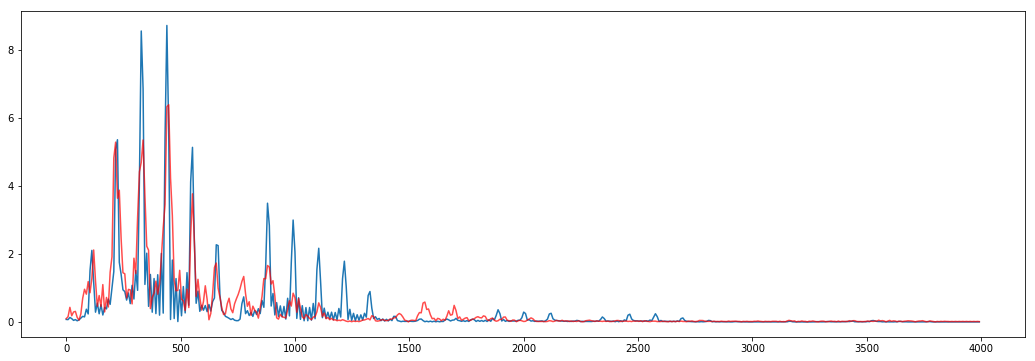

In [91]:
y = string_data[(string_data["String"] == "5") & (note_data["Note"] == "A2")].sample().drop("String", axis=1).values.flatten()
w = np.fft.fft(y, n=1000)
freqs = np.fft.fftfreq(len(w))
plt.figure(figsize=(18,6))
plt.plot(8000*freqs[freqs >= 0],abs(w[freqs >= 0]))

y = string_data[(string_data["String"] == "6") & (note_data["Note"] == "A2")].sample().drop("String", axis=1).values.flatten()
w = np.fft.fft(y, n=1000)
freqs = np.fft.fftfreq(len(w))
plt.plot(8000*freqs[freqs >= 0],abs(w[freqs >= 0]), 'r', alpha=.7)

In [16]:
def file_to_spectral_string_data(file, rs):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)

    df = pd.DataFrame(columns=["x{}".format(i) for i in range(500)]+["String"])
    string = file.split("/")[4].split("_")[2][-1]

    for i in tqdm(range(0, len(y), 4000), leave = False):
        note = y[i:i+4000]
        note = note[np.argwhere(note >= 0.001)[0][0]:]
        w = abs(np.fft.fft(note, n=1000))
        freqs = np.fft.fftfreq(len(w))
        df = df.append(pd.DataFrame({**{"x{}".format(j): w[freqs >= 0][j] for j in range(500)}, 
                                    **{"String": [string]}}))
    df = df.reset_index(drop=True)
    return df

In [17]:
test = file_to_spectral_string_data("../Samples/Guitar/Ind_notes/Guitar_noamp_string1_0.mp3", 8000)
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,String
0,0.085955,0.055342,0.033657,0.032606,0.048227,0.050333,0.093030,0.075474,0.084657,0.093055,...,0.002497,0.001314,0.001276,0.000902,0.003287,0.001281,0.001009,0.000761,0.000493,1
1,0.019762,0.013981,0.027034,0.032128,0.034636,0.041496,0.064660,0.028007,0.039612,0.039164,...,0.001594,0.001560,0.001584,0.001241,0.001681,0.001662,0.001654,0.001628,0.001610,1
2,0.032018,0.012256,0.057023,0.067227,0.063084,0.055242,0.068268,0.029341,0.044737,0.077837,...,0.001132,0.001003,0.000892,0.000868,0.000847,0.000605,0.000842,0.000944,0.000924,1
3,0.072441,0.105684,0.042376,0.037729,0.059744,0.046046,0.042553,0.087669,0.114122,0.049768,...,0.032676,0.031758,0.031941,0.031615,0.031282,0.031262,0.031373,0.031384,0.031276,1
4,0.088861,0.136563,0.126984,0.090219,0.075230,0.080184,0.109471,0.183129,0.151091,0.138766,...,0.012302,0.012101,0.012355,0.012215,0.012387,0.012862,0.011788,0.012076,0.012168,1


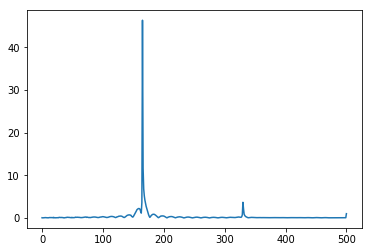

In [18]:
plt.plot(test.iloc[24].values)

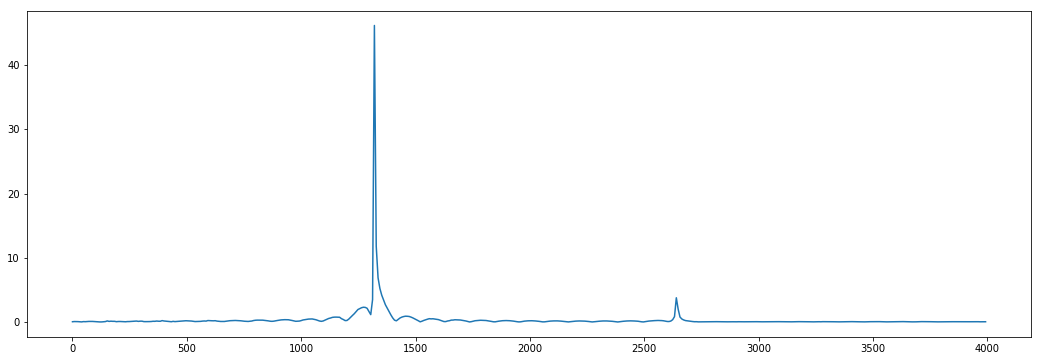

In [93]:
y, sr = librosa.load("../Samples/Guitar/Ind_notes/Guitar_noamp_string1_0.mp3", mono=False)
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)
note = y[24*4000:24*4000+4000]
w = np.fft.fft(note, n=1000)
freqs = np.fft.fftfreq(len(w))
plt.figure(figsize=(18,6))
plt.plot(8000*freqs[freqs >= 0],abs(w[freqs >= 0]))

In [102]:
def dir_to_spectral_string_data(directory, rs):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(500)]+["String"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = file_to_spectral_string_data(directory + file, rs)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [103]:
data = dir_to_spectral_string_data("../Samples/Guitar/Ind_notes/", 8000)

In [104]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,String
0,0.085955,0.055342,0.033657,0.032606,0.048227,0.050333,0.093030,0.075474,0.084657,0.093055,...,0.002497,0.001314,0.001276,0.000902,0.003287,0.001281,0.001009,0.000761,0.000493,1
1,0.019762,0.013981,0.027034,0.032128,0.034636,0.041496,0.064660,0.028007,0.039612,0.039164,...,0.001594,0.001560,0.001584,0.001241,0.001681,0.001662,0.001654,0.001628,0.001610,1
2,0.032018,0.012256,0.057023,0.067227,0.063084,0.055242,0.068268,0.029341,0.044737,0.077837,...,0.001132,0.001003,0.000892,0.000868,0.000847,0.000605,0.000842,0.000944,0.000924,1
3,0.072441,0.105684,0.042376,0.037729,0.059744,0.046046,0.042553,0.087669,0.114122,0.049768,...,0.032676,0.031758,0.031941,0.031615,0.031282,0.031262,0.031373,0.031384,0.031276,1
4,0.088861,0.136563,0.126984,0.090219,0.075230,0.080184,0.109471,0.183129,0.151091,0.138766,...,0.012302,0.012101,0.012355,0.012215,0.012387,0.012862,0.011788,0.012076,0.012168,1


In [105]:
data.shape

(7175, 501)

In [106]:
data.to_pickle("../Data/Guitar/guitar-spectral-string-data-500.pkl")

## Spectral norm

In [18]:
def file_to_norm_spectral_string_data(file, rs):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)

    df = pd.DataFrame(columns=["x{}".format(i) for i in range(500)]+["String"])
    string = file.split("/")[4].split("_")[2][-1]

    for i in tqdm(range(0, len(y), 4000), leave = False):
        note = y[i:i+4000]
        note = note[np.argwhere(note >= 0.001)[0][0]:]
        w = abs(np.fft.fft(note, n=1000))
        freqs = np.fft.fftfreq(len(w)) 
        df = df.append(pd.DataFrame({**{"x{}".format(j): w[freqs >= 0][j]/np.max(w) for j in range(500)}, 
                                     **{"String": [string]}}))
    df = df.reset_index(drop=True)
    return df

In [19]:
test = file_to_norm_spectral_string_data("../Samples/Guitar/Ind_notes/Guitar_noamp_string1_0.mp3", 8000)
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,String
0,0.009313,0.005996,0.003646,0.003533,0.005225,0.005453,0.010079,0.008177,0.009172,0.010082,...,0.000271,0.000142,0.000138,0.000098,0.000356,0.000139,0.000109,0.000082,0.000053,1
1,0.002541,0.001798,0.003476,0.004131,0.004454,0.005336,0.008315,0.003602,0.005094,0.005036,...,0.000205,0.000201,0.000204,0.000160,0.000216,0.000214,0.000213,0.000209,0.000207,1
2,0.003780,0.001447,0.006733,0.007937,0.007448,0.006522,0.008060,0.003464,0.005282,0.009190,...,0.000134,0.000118,0.000105,0.000102,0.000100,0.000071,0.000099,0.000111,0.000109,1
3,0.009631,0.014050,0.005634,0.005016,0.007942,0.006121,0.005657,0.011655,0.015172,0.006616,...,0.004344,0.004222,0.004246,0.004203,0.004159,0.004156,0.004171,0.004172,0.004158,1
4,0.007069,0.010863,0.010101,0.007177,0.005984,0.006378,0.008708,0.014568,0.012019,0.011039,...,0.000979,0.000963,0.000983,0.000972,0.000985,0.001023,0.000938,0.000961,0.000968,1


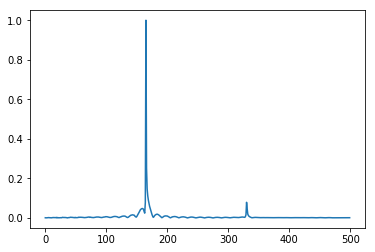

In [15]:
plt.plot(test.drop("String", axis=1).iloc[24].values)

In [20]:
def dir_to_norm_spectral_string_data(directory, rs):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(500)]+["String"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = file_to_norm_spectral_string_data(directory + file, rs)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [21]:
data = dir_to_norm_spectral_string_data("../Samples/Guitar/Ind_notes/", 8000)

In [22]:
data.shape

(7175, 501)

In [23]:
data.to_pickle("../Data/Guitar/guitar-norm-spectral-string-data-500.pkl")